In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [7]:
allData = pd.read_csv("journal.pone.0185912.s003.csv")
allData.head()

,Source,Site_source,Target,Site_target,Transfers,Year,Week
0,AcuteMedicalUnit.EAU,PRUH,ChartwellUnit,PRUH,1,2014,48
1,AcuteMedicalUnit.EAU,PRUH,ChartwellUnit,PRUH,2,2014,49
2,AcuteMedicalUnit.EAU,PRUH,ChartwellUnit,PRUH,2,2014,50
3,AcuteMedicalUnit.EAU,PRUH,ChartwellUnit,PRUH,3,2014,51
4,AcuteMedicalUnit.EAU,PRUH,ChartwellUnit,PRUH,2,2015,1


In [8]:
np.unique(allData.Site_source)

array(['DH', 'Orpington', 'PRUH'], dtype=object)

In [9]:
allData.shape

(31338, 7)

In [10]:
allData.Transfers.sum()

195257

In [11]:
def common_member(a, b): 
      
    a_set = set(a) 
    b_set = set(b) 
      
    # check length  
    if len(a_set.intersection(b_set)) > 0: 
        return(a_set.intersection(b_set))   
    else: 
        return("no common elements") 

In [16]:
PRUHData = allData[allData['Site_source'] == 'PRUH']
PRUHData = PRUHData[PRUHData['Year'] == 2015]
PRUHWards = np.unique(PRUHData.Source)
PRUHData['transfer'] = PRUHData.Source + PRUHData.Target
PRUHData['transfer_backwards'] = PRUHData.Target + PRUHData.Source
print(np.unique(PRUHData.transfer_backwards).shape,np.unique(PRUHData.transfer).shape)
twoWayTransfers = np.intersect1d(np.unique(PRUHData.transfer_backwards),np.unique(PRUHData.transfer))
print(twoWayTransfers.shape, twoWayTransfers)
PRUHAllTransfers = np.unique(PRUHData.transfer)

common1 = PRUHData[PRUHData['transfer'] == 'CoronaryCareUnit.PRUH.AcuteMedicalUnit.EAU']
twoWayTransfers.shape

PRUHData['transfer_final'] = PRUHData.Source + PRUHData.Target
PRUHData['target_final'] = 0
PRUHData['source_final'] = 0



((739,), (739,))
((426,), array(['AcuteMedicalUnit.EAUClinicalDecisionUnit.PRUH',
       'AcuteMedicalUnit.EAUCoronaryCareUnit.PRUH.',
       'AcuteMedicalUnit.EAUDischargeLounge',
       'AcuteMedicalUnit.EAUFarnboroughWard',
       'AcuteMedicalUnit.EAUHASU.HyperAcuteStrokeUnit.PRUH.',
       'AcuteMedicalUnit.EAUMedicalWard1',
       'AcuteMedicalUnit.EAUMedicalWard3',
       'AcuteMedicalUnit.EAUMedicalWard4',
       'AcuteMedicalUnit.EAUMedicalWard7',
       'AcuteMedicalUnit.EAUMedicalWard8',
       'AcuteMedicalUnit.EAUMedicalWard9',
       'AcuteMedicalUnit.EAUPlannedInvestigationUnit',
       'AcuteMedicalUnit.EAURecoveryWard1',
       'AcuteMedicalUnit.EAUStrokeUnit.PRUH.',
       'AcuteMedicalUnit.EAUSurgicalWard3.SAU.',
       'AcuteMedicalUnit.EAUSurgicalWard4',
       'AcuteMedicalUnit.EAUSurgicalWard5',
       'AcuteMedicalUnit.EAUSurgicalWard6',
       'AcuteMedicalUnit.EAUSurgicalWard7.Ortho.',
       'ChartwellUnitClinicalDecisionUnit.PRUH',
       'ChartwellUnitCoron

In [17]:
for index,row in PRUHData.iterrows():
    #if row['transfer'] in twoWayTransfers:
        #print(PRUHData.loc[index,'transfer_final'])
        if row.Source < row.Target:
            PRUHData.loc[index,'transfer_final'] = row.Source + row.Target
            PRUHData.loc[index,'source_final'] = row.Source
            PRUHData.loc[index,'target_final'] = row.Target
            #print(PRUHData.loc[index,'transfer_final'])
        elif row.Source > row.Target:
            PRUHData.loc[index,'transfer_final'] = row.Target + row.Source
            PRUHData.loc[index,'source_final'] = row.Target
            PRUHData.loc[index,'target_final'] = row.Source
            
        else:
            print('error - source: ',row.Source,' target: ',row.Target)
        #print(PRUHData.loc[index,'transfer_final'])
PRUHData.head()          

,Source,Site_source,Target,Site_target,Transfers,Year,Week,transfer,transfer_backwards,transfer_final,target_final,source_final
4,AcuteMedicalUnit.EAU,PRUH,ChartwellUnit,PRUH,2,2015,1,AcuteMedicalUnit.EAUChartwellUnit,ChartwellUnitAcuteMedicalUnit.EAU,AcuteMedicalUnit.EAUChartwellUnit,ChartwellUnit,AcuteMedicalUnit.EAU
5,AcuteMedicalUnit.EAU,PRUH,ChartwellUnit,PRUH,1,2015,2,AcuteMedicalUnit.EAUChartwellUnit,ChartwellUnitAcuteMedicalUnit.EAU,AcuteMedicalUnit.EAUChartwellUnit,ChartwellUnit,AcuteMedicalUnit.EAU
6,AcuteMedicalUnit.EAU,PRUH,ChartwellUnit,PRUH,2,2015,3,AcuteMedicalUnit.EAUChartwellUnit,ChartwellUnitAcuteMedicalUnit.EAU,AcuteMedicalUnit.EAUChartwellUnit,ChartwellUnit,AcuteMedicalUnit.EAU
7,AcuteMedicalUnit.EAU,PRUH,ChartwellUnit,PRUH,2,2015,5,AcuteMedicalUnit.EAUChartwellUnit,ChartwellUnitAcuteMedicalUnit.EAU,AcuteMedicalUnit.EAUChartwellUnit,ChartwellUnit,AcuteMedicalUnit.EAU
8,AcuteMedicalUnit.EAU,PRUH,ChartwellUnit,PRUH,3,2015,6,AcuteMedicalUnit.EAUChartwellUnit,ChartwellUnitAcuteMedicalUnit.EAU,AcuteMedicalUnit.EAUChartwellUnit,ChartwellUnit,AcuteMedicalUnit.EAU


In [14]:
print(np.unique(PRUHData.transfer).shape)
print(np.unique(PRUHData.transfer_final).shape,np.unique(PRUHData.source_final).shape )
PRUHData.head()


(739,)
((526,), (56,))


,Source,Site_source,Target,Site_target,Transfers,Year,Week,transfer,transfer_backwards,transfer_final,target_final,source_final
4,AcuteMedicalUnit.EAU,PRUH,ChartwellUnit,PRUH,2,2015,1,AcuteMedicalUnit.EAUChartwellUnit,ChartwellUnitAcuteMedicalUnit.EAU,AcuteMedicalUnit.EAUChartwellUnit,ChartwellUnit,AcuteMedicalUnit.EAU
5,AcuteMedicalUnit.EAU,PRUH,ChartwellUnit,PRUH,1,2015,2,AcuteMedicalUnit.EAUChartwellUnit,ChartwellUnitAcuteMedicalUnit.EAU,AcuteMedicalUnit.EAUChartwellUnit,ChartwellUnit,AcuteMedicalUnit.EAU
6,AcuteMedicalUnit.EAU,PRUH,ChartwellUnit,PRUH,2,2015,3,AcuteMedicalUnit.EAUChartwellUnit,ChartwellUnitAcuteMedicalUnit.EAU,AcuteMedicalUnit.EAUChartwellUnit,ChartwellUnit,AcuteMedicalUnit.EAU
7,AcuteMedicalUnit.EAU,PRUH,ChartwellUnit,PRUH,2,2015,5,AcuteMedicalUnit.EAUChartwellUnit,ChartwellUnitAcuteMedicalUnit.EAU,AcuteMedicalUnit.EAUChartwellUnit,ChartwellUnit,AcuteMedicalUnit.EAU
8,AcuteMedicalUnit.EAU,PRUH,ChartwellUnit,PRUH,3,2015,6,AcuteMedicalUnit.EAUChartwellUnit,ChartwellUnitAcuteMedicalUnit.EAU,AcuteMedicalUnit.EAUChartwellUnit,ChartwellUnit,AcuteMedicalUnit.EAU


In [18]:
groupedData = PRUHData.groupby(['transfer', 'Target', 'Source', 'transfer_backwards'] ).sum()
groupedData = groupedData[groupedData['Transfers']>10]
print(groupedData.shape, type(groupedData))


newGroup = 
groupedData.head()

SyntaxError: invalid syntax (<ipython-input-18-b853811781e1>, line 6)

In [26]:
groupedData = PRUHData.groupby('transfer_final' ).agg({
    'Transfers': 'sum',
    'source_final': 'first',
    'target_final': 'first'
})
groupedData = groupedData[groupedData['Transfers']>10]
print(groupedData.shape, type(groupedData))

total_transfers = groupedData.Transfers.sum()
groupedData['weight'] = groupedData.Transfers/total_transfers
print(groupedData.head(10))
groupedData.columns.values
groupedData.head(10)

((221, 3), <class 'pandas.core.frame.DataFrame'>)
                                                    Transfers  \
transfer_final                                                  
AcuteMedicalUnit.EAUChartwellUnit                         108   
AcuteMedicalUnit.EAUClinicalDecisionUnit.PRUH             137   
AcuteMedicalUnit.EAUCoronaryCareUnit.PRUH.                274   
AcuteMedicalUnit.EAUDischargeLounge                       413   
AcuteMedicalUnit.EAUExitHospital                         1726   
AcuteMedicalUnit.EAUFarnboroughWard                       203   
AcuteMedicalUnit.EAUHASU.HyperAcuteStrokeUnit.P...         81   
AcuteMedicalUnit.EAUIntensiveCare.HighDepUnit.P...         67   
AcuteMedicalUnit.EAUKCH.EmergencyDept                      33   
AcuteMedicalUnit.EAUMedicalWard1                          195   

                                                            source_final  \
transfer_final                                                             
AcuteMedicalUnit.

,Transfers,source_final,target_final,weight
transfer_final,,,,
AcuteMedicalUnit.EAUChartwellUnit,108,AcuteMedicalUnit.EAU,ChartwellUnit,0.001722
AcuteMedicalUnit.EAUClinicalDecisionUnit.PRUH,137,AcuteMedicalUnit.EAU,ClinicalDecisionUnit.PRUH,0.002185
AcuteMedicalUnit.EAUCoronaryCareUnit.PRUH.,274,AcuteMedicalUnit.EAU,CoronaryCareUnit.PRUH.,0.004370
AcuteMedicalUnit.EAUDischargeLounge,413,AcuteMedicalUnit.EAU,DischargeLounge,0.006587
AcuteMedicalUnit.EAUExitHospital,1726,AcuteMedicalUnit.EAU,ExitHospital,0.027527
AcuteMedicalUnit.EAUFarnboroughWard,203,AcuteMedicalUnit.EAU,FarnboroughWard,0.003238
AcuteMedicalUnit.EAUHASU.HyperAcuteStrokeUnit.PRUH.,81,AcuteMedicalUnit.EAU,HASU.HyperAcuteStrokeUnit.PRUH.,0.001292
AcuteMedicalUnit.EAUIntensiveCare.HighDepUnit.PRUH.,67,AcuteMedicalUnit.EAU,IntensiveCare.HighDepUnit.PRUH.,0.001069
AcuteMedicalUnit.EAUKCH.EmergencyDept,33,AcuteMedicalUnit.EAU,KCH.EmergencyDept,0.000526


In [27]:
edges = []
for link in np.unique(PRUHData.transfer):
    print(link)
    sumOfTransfers = PRUHData[PRUHData['transfer'] == link].Transfers.sum())
    

SyntaxError: invalid syntax (<ipython-input-27-094d47c8c5c0>, line 4)

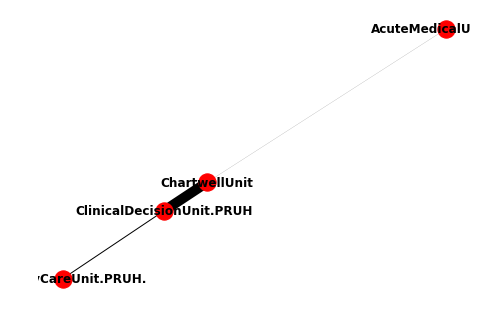

In [28]:
G = nx.Graph()
G.add_nodes_from(PRUHWards[0:2])
G.add_nodes_from(PRUHWards[1:3])
G.add_edge(PRUHWards[0], PRUHWards[1], weight = 0.1)
G.add_edge(PRUHWards[1], PRUHWards[2], weight = 10)
G.add_edge(PRUHWards[2], PRUHWards[3], weight = 1)

edges = G.edges()
#colors = [G[u][v]['color'] for u,v in edges]
weights = [G[u][v]['weight'] for u,v in edges]

nx.draw(G, with_labels=True, font_weight='bold', width = weights)
plt.show()

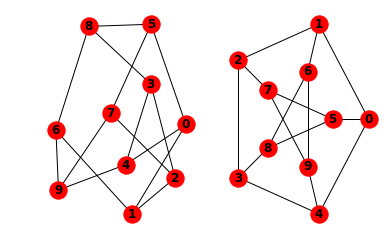

In [29]:
G = nx.petersen_graph()
plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')
plt.show()

In [30]:
weights_array = np.array(groupedData['weight'].values.tolist())

groupedData['weight_range'] = np.where(weights_array < 0.1, 0.1, weights_array).tolist()
weights_array = np.array(groupedData['weight_range'].values.tolist())
groupedData['weight_range'] = np.where(weights_array > 10, 10, weights_array).tolist()

groupedData.shape

(221, 5)

Name: 
Type: Graph
Number of nodes: 31
Number of edges: 221
Average degree:  14.2581


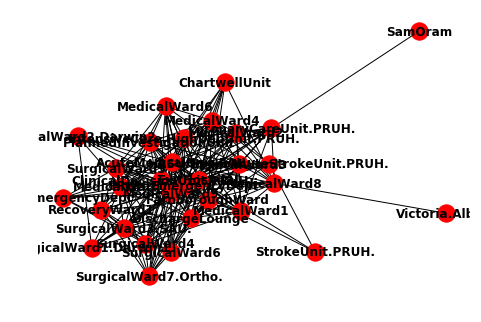

In [34]:
network = nx.Graph()
network.add_nodes_from(np.unique(groupedData.source_final))
network.add_nodes_from(np.unique(groupedData.target_final))
for index,row in groupedData.iterrows():
    network.add_edge(row.source_final, row.target_final, weight = row.weight_range)
    
print(nx.info(network))
#network_weights = [network[u][v]['weight'] for u,v in edges]

nx.draw(network, with_labels=True, font_weight='bold')
#plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

In [32]:
print(nx.info(network))

Name: 
Type: Graph
Number of nodes: 31
Number of edges: 221
Average degree:  14.2581


In [33]:
allData.head()

,Source,Site_source,Target,Site_target,Transfers,Year,Week
0,AcuteMedicalUnit.EAU,PRUH,ChartwellUnit,PRUH,1,2014,48
1,AcuteMedicalUnit.EAU,PRUH,ChartwellUnit,PRUH,2,2014,49
2,AcuteMedicalUnit.EAU,PRUH,ChartwellUnit,PRUH,2,2014,50
3,AcuteMedicalUnit.EAU,PRUH,ChartwellUnit,PRUH,3,2014,51
4,AcuteMedicalUnit.EAU,PRUH,ChartwellUnit,PRUH,2,2015,1
